In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

## Import Data

In [2]:
df = pd.read_csv('yield_df.csv')
df.head(3)

,Unnamed: 0.1,Unnamed: 0,Area,Item,Year,Yield,Avg Rainfall,Pesticides,Temperature,k_labels,Cluster
0,0,0,Albania,Maize,1990,36613,1485,121.0,16.37,1,1
1,1,1,Albania,Potatoes,1990,66667,1485,121.0,16.37,1,1
2,2,2,Albania,Rice,1990,23333,1485,121.0,16.37,1,1


In [3]:
df.tail(5)

,Unnamed: 0.1,Unnamed: 0,Area,Item,Year,Yield,Avg Rainfall,Pesticides,Temperature,k_labels,Cluster
28237,28237,28237,Zimbabwe,Rice,2013,22581,657,2550.07,19.76,1,1
28238,28238,28238,Zimbabwe,Sorghum,2013,3066,657,2550.07,19.76,1,1
28239,28239,28239,Zimbabwe,Soybeans,2013,13142,657,2550.07,19.76,1,1
28240,28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657,2550.07,19.76,1,1
28241,28241,28241,Zimbabwe,Wheat,2013,22888,657,2550.07,19.76,1,1


## EDA

The complete [y-data profilling report](https://leumasjo.github.io/ydata/YDATA%20Crop_Yield)

In [4]:
# check for nulls
df.isna().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Area            0
Item            0
Year            0
Yield           0
Avg Rainfall    0
Pesticides      0
Temperature     0
k_labels        0
Cluster         0
dtype: int64

In [5]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  28242 non-null  int64  
 1   Unnamed: 0    28242 non-null  int64  
 2   Area          28242 non-null  object 
 3   Item          28242 non-null  object 
 4   Year          28242 non-null  int64  
 5   Yield         28242 non-null  int64  
 6   Avg Rainfall  28242 non-null  int64  
 7   Pesticides    28242 non-null  float64
 8   Temperature   28242 non-null  float64
 9   k_labels      28242 non-null  int64  
 10  Cluster       28242 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 2.4+ MB


(28242, 11)

In [6]:
# Convert any data type
# Convert object type to category type
df['Area'] = df['Area'].astype('category')
df['Item'] = df['Item'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Unnamed: 0.1  28242 non-null  int64   
 1   Unnamed: 0    28242 non-null  int64   
 2   Area          28242 non-null  category
 3   Item          28242 non-null  category
 4   Year          28242 non-null  int64   
 5   Yield         28242 non-null  int64   
 6   Avg Rainfall  28242 non-null  int64   
 7   Pesticides    28242 non-null  float64 
 8   Temperature   28242 non-null  float64 
 9   k_labels      28242 non-null  int64   
 10  Cluster       28242 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 2.0 MB


In [7]:
# Impute or delete any data as required

# none noted...

## EDA Visualizations

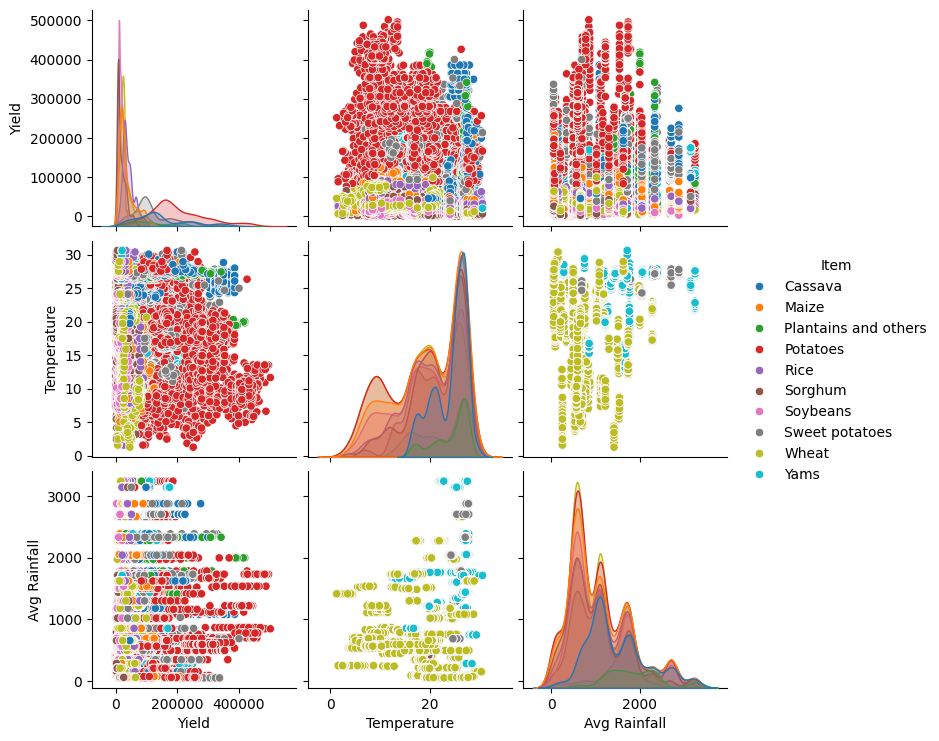

In [8]:
sns.pairplot(df[['Area', 'Item', 'Yield', 'Temperature', 'Avg Rainfall']], diag_kind='kde', hue='Item');

## Prepare the X and y data

- Use one hot encoding for any object or categorical features
- Standardize / Normalize any numeric features

In [9]:
X = df.drop(columns=['Item'])
y = df['Item']

In [10]:
# one-hot encoding 
X = pd.get_dummies(X, drop_first=True)
X.head()

,Unnamed: 0.1,Unnamed: 0,Year,Yield,Avg Rainfall,Pesticides,Temperature,k_labels,Cluster,Area_Algeria,...,Area_Tajikistan,Area_Thailand,Area_Tunisia,Area_Turkey,Area_Uganda,Area_Ukraine,Area_United Kingdom,Area_Uruguay,Area_Zambia,Area_Zimbabwe
0,0,0,1990,36613,1485,121.0,16.37,1,1,False,...,False,False,False,False,False,False,False,False,False,False
1,1,1,1990,66667,1485,121.0,16.37,1,1,False,...,False,False,False,False,False,False,False,False,False,False
2,2,2,1990,23333,1485,121.0,16.37,1,1,False,...,False,False,False,False,False,False,False,False,False,False
3,3,3,1990,12500,1485,121.0,16.37,0,0,False,...,False,False,False,False,False,False,False,False,False,False
4,4,4,1990,7000,1485,121.0,16.37,0,0,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
# Scale the data after spliting for Train / Test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

scaler = StandardScaler()
scaler.fit(X_train) 

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Apply SMOTE
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [13]:
X_train.shape, len(X_train_res)

((19769, 109), 29930)

In [14]:
y_train.value_counts()

Item
Potatoes                2993
Maize                   2893
Wheat                   2686
Rice                    2372
Soybeans                2244
Sorghum                 2120
Sweet potatoes          2025
Cassava                 1456
Yams                     595
Plantains and others     385
Name: count, dtype: int64

In [15]:
y_train_res.value_counts()

Item
Cassava                 2993
Maize                   2993
Plantains and others    2993
Potatoes                2993
Rice                    2993
Sorghum                 2993
Soybeans                2993
Sweet potatoes          2993
Wheat                   2993
Yams                    2993
Name: count, dtype: int64

## Create the Model

In [16]:
mdl_selected = 'DecisionTreeClassifier'

In [17]:
mdl = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=42, splitter='best')
mdl.fit(X_train_res, y_train_res)

DecisionTreeClassifier(random_state=42)

## Predict y-hat

In [18]:
y_pred = mdl.predict(X_test)
y_pred

array(['Cassava', 'Wheat', 'Rice', ..., 'Soybeans', 'Wheat', 'Wheat'],
      dtype=object)

## Probability

In [19]:
# probability scores... 
# I do this first as it's kinda my "thing" - many don't use probability scoring in their pipelines
y_proba = mdl.predict_proba(X_test)

# bring in just the probability of y_pred
res = pd.DataFrame({'y_true':y_test, 
              'y_pred':y_pred, 
              'proba': [max(proba) for proba in y_proba]
              })
res['match'] = np.where(res['y_true'] == res['y_pred'], 1, 0)

# report the "misses"
misses = res[res['match'] == 0]
miss_count = len(misses)

In [20]:
print(f'There are {miss_count} misses vs {len(y_test)} total.\n% Total Missed: {miss_count / len(y_test) * 100:.3f}%')

There are 1338 misses vs 8473 total.
% Total Missed: 15.791%


In [21]:
misses.sort_values('proba', ascending = False).head()

,y_true,y_pred,proba,match
23603,Maize,Wheat,1.0,0
27308,Sorghum,Soybeans,1.0,0
25685,Potatoes,Plantains and others,1.0,0
20057,Wheat,Rice,1.0,0
15788,Rice,Sorghum,1.0,0


## Metrics for Classification

### Accuracy
The ratio of correctly predicted instances to the total instances.

In [22]:
# assigning y_test to variable y_true to help with clarity while learning...
y_true = y_test
y_pred = mdl.predict(X_test)
accuracy = accuracy_score(y_true, y_pred)
print(f"The accuracy of the {mdl_selected} model: {accuracy:.2f}\nUnformated Value: {accuracy}")

The accuracy of the DecisionTreeClassifier model: 0.84
Unformated Value: 0.842086628112829


### Precision
The ratio of correctly predicted positive observations to the total predicted positives.

In [23]:
precision = precision_score(y_true, y_pred, average='weighted')
print(f"The precision of the {mdl_selected} model: {precision:.2f}\nUnformated Value: {precision}")

The precision of the DecisionTreeClassifier model: 0.84
Unformated Value: 0.8426823417930165


### Recall (Sensitivity)
The ratio of correctly predicted positive observations to all observations in the actual class.

In [24]:
recall = recall_score(y_true, y_pred, average='weighted')  # weighted
print(f"The recall of the {mdl_selected} model: {recall:.2f}\nUnformated Value: {recall}")

The recall of the DecisionTreeClassifier model: 0.84
Unformated Value: 0.842086628112829


### F1 Score 
The weighted average of Precision and Recall.


In [25]:
f1 = f1_score(y_true, y_pred, average='weighted') # weighted

print(f"The f1 of the {mdl_selected} model: {f1:.2f}\nUnformated Value: {recall}")

The f1 of the DecisionTreeClassifier model: 0.84
Unformated Value: 0.842086628112829


### Classification Report
A comprehensive report showing precision, recall, F1 score, and support for each class.

In [26]:
report = classification_report(y_true, y_pred)
print(report)

                      precision    recall  f1-score   support

             Cassava       0.86      0.85      0.85       589
               Maize       0.80      0.79      0.80      1228
Plantains and others       0.68      0.73      0.70       171
            Potatoes       0.91      0.90      0.90      1283
                Rice       0.83      0.83      0.83      1016
             Sorghum       0.80      0.79      0.80       919
            Soybeans       0.87      0.87      0.87       979
      Sweet potatoes       0.87      0.87      0.87       865
               Wheat       0.85      0.85      0.85      1171
                Yams       0.76      0.82      0.79       252

            accuracy                           0.84      8473
           macro avg       0.82      0.83      0.83      8473
        weighted avg       0.84      0.84      0.84      8473



### Confusion Matrix
A table used to describe the performance of a classification model.

In [27]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[ 500,    0,   15,   22,    9,    0,    1,   22,    4,   16],
       [   3,  976,    0,   11,   71,   59,   29,   11,   67,    1],
       [  15,    0,  125,   13,    3,    4,    0,    2,    0,    9],
       [  14,    9,   31, 1150,   15,    2,    0,   49,    0,   13],
       [   9,   71,    5,    8,  845,   30,    8,    7,   27,    6],
       [   1,   66,    0,    2,   30,  729,   50,    1,   40,    0],
       [   1,   22,    0,    1,   12,   54,  854,    0,   35,    0],
       [  30,    8,    5,   36,    8,    0,    2,  755,    0,   21],
       [   1,   67,    0,    5,   29,   34,   39,    2,  994,    0],
       [  10,    1,    3,   11,    1,    1,    0,   18,    0,  207]],
      dtype=int64)

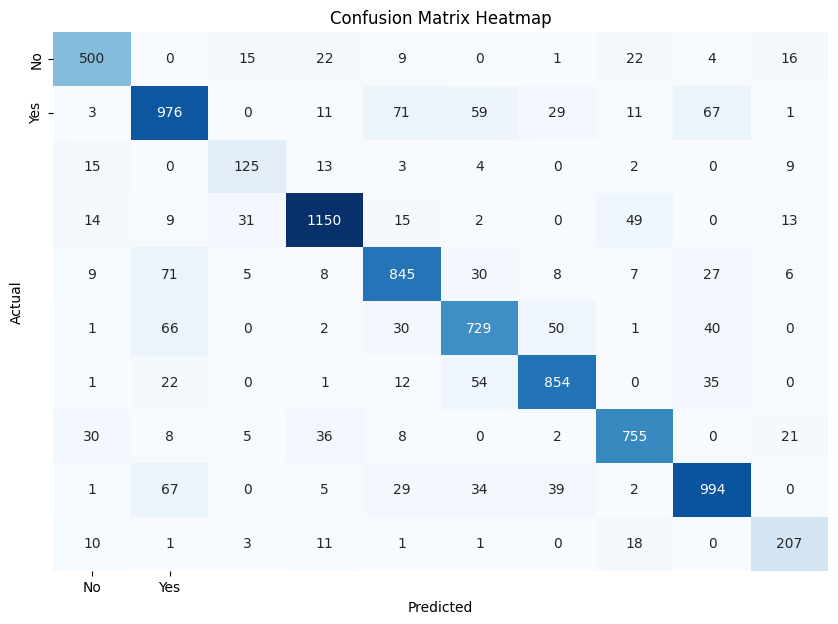

In [28]:
class_labels = ['No', 'Yes']

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [1]:
!python --version

Python 3.10.16
